## DATASET 2

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from scipy.io import arff

In [10]:
dataset_2 = arff.loadarff('dataset/PC1.arff')
df_2 = pd.DataFrame(dataset_2[0])
print("PC1 Software defect prediction")
df_2.head()

PC1 Software defect prediction


,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'0'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'1'
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0,b'1'
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0,b'1'
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0,b'1'


In [11]:
xx = df_2.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)
df_2 = pd.DataFrame(x_scaled, columns=df_2.columns)

In [12]:
df_2.describe()

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,0.038831,0.033413,0.014482,0.019028,0.041808,0.026971,0.064707,0.056884,0.054994,0.006735,...,0.037391,0.029535,0.019687,0.029981,0.125588,0.038834,0.039935,0.044495,0.036496,0.069432
std,0.058611,0.066363,0.045637,0.052475,0.070883,0.058188,0.073476,0.060362,0.059144,0.039873,...,0.055958,0.066154,0.069694,0.054672,0.083492,0.053999,0.068112,0.075445,0.070386,0.254302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011628,0.000000,0.000000,0.000000,0.008621,0.003765,0.025000,0.021097,0.023465,0.000130,...,0.011667,0.000000,0.000000,0.004444,0.071429,0.011152,0.008537,0.008741,0.000000,0.000000
50%,0.021595,0.014815,0.000000,0.008197,0.020474,0.010604,0.040000,0.042895,0.039393,0.000745,...,0.021667,0.000000,0.000000,0.008889,0.112245,0.022305,0.019512,0.020979,0.017021,0.000000
75%,0.043189,0.037037,0.016393,0.016393,0.044899,0.025982,0.080000,0.075741,0.068775,0.002893,...,0.040000,0.031447,0.020833,0.035556,0.163265,0.046468,0.043293,0.048951,0.042553,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

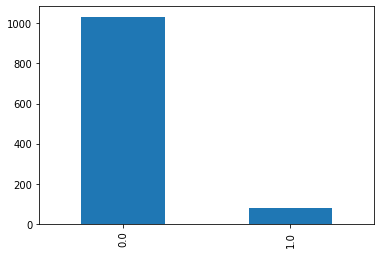

In [13]:
df_2['defects'].value_counts().plot(kind='bar')


In [14]:
X2 = df_2.drop(columns=['defects'])
X2.head()

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0.001827,0.002963,0.003279,0.003279,0.000108,0.000050,0.650,0.004803,0.002173,3.037644e-07,...,0.000005,0.003333,0.012579,0.041667,0.008889,0.002041,0.002230,0.000122,0.001049,0.001702
1,0.001661,0.000000,0.000000,0.000000,0.000000,0.000039,0.500,0.003695,0.001671,2.336649e-07,...,0.000004,0.001667,0.006289,0.020833,0.004444,0.000000,0.001859,0.000000,0.000874,0.000000
2,0.151163,0.059259,0.016393,0.008197,0.113865,0.080532,0.020,0.102269,0.126134,1.351360e-02,...,0.013514,0.133333,0.276730,0.229167,0.137778,0.285714,0.122677,0.116463,0.110140,0.068085
3,0.181063,0.148148,0.032787,0.139344,0.136494,0.098200,0.020,0.104818,0.150068,1.688992e-02,...,0.016890,0.161667,0.257862,0.250000,0.106667,0.275510,0.139405,0.139024,0.132867,0.157447
4,0.838870,0.777778,0.327869,0.663934,0.839799,0.797794,0.005,0.280536,0.455568,3.672060e-01,...,0.367206,0.761667,0.446541,1.000000,0.217778,0.642857,0.737918,0.851220,0.823427,0.753191


In [15]:
y2 = df_2['defects'].values
y2=y2.astype('int')
y2[0:94]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Resultados
Para a avaliação dos classificadores k-NN com e sem peso, cada base de dados foi submetida ao k-fold cross validation, onde o valor escolhido para k foi 10. Cada classificador executou para os números de vizinhos k = {1,2,3,5,7,9,11,13,15}. As acurácias obtidas utilizando o dataset 1 seguem abaixo:

In [16]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_weight = KNeighborsClassifier(weights='distance')

k_values = [1,2,3,5,7,9,11,13,15]
param_grid = {'n_neighbors': k_values}

# k-NN sem peso
knn_gscv2 = GridSearchCV(knn, param_grid, cv=10)
knn_gscv2.fit(X2, y2)
# k-NN com peso
knn_weight_gscv2 = GridSearchCV(knn_weight, param_grid, cv=10)
knn_weight_gscv2.fit(X2, y2)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15]})

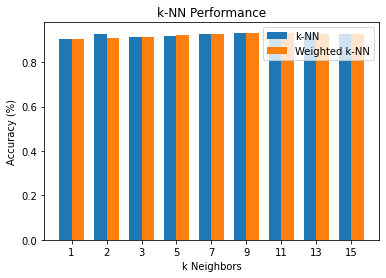

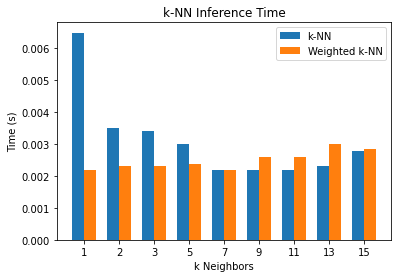

In [17]:
fig, ax = plt.subplots()

index = np.arange(len(k_values))
bar_width = 0.35
opacity = 0.4
rects1 = ax.bar(index, knn_gscv2.cv_results_['mean_test_score'], bar_width, label='k-NN')
rects2 = ax.bar(index+bar_width, knn_weight_gscv2.cv_results_['mean_test_score'], bar_width, label='Weighted k-NN')

ax.set_xlabel('k Neighbors')
ax.set_ylabel('Accuracy (%)')
ax.set_title('k-NN Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '5', '7', '9', '11', '13', '15'))
ax.legend()

fig, ax = plt.subplots()

index = np.arange(len(k_values))
bar_width = 0.35
opacity = 0.4
rects1 = ax.bar(index, knn_gscv2.cv_results_['mean_fit_time'], bar_width, label='k-NN')
rects2 = ax.bar(index+bar_width, knn_weight_gscv2.cv_results_['mean_fit_time'], bar_width, label='Weighted k-NN')

ax.set_xlabel('k Neighbors')
ax.set_ylabel('Time (s)')
ax.set_title('k-NN Inference Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '5', '7', '9', '11', '13', '15'))
ax.legend()
